In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


QUESTIONS:

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

A. Women tended to better on reading and writing, men better on math. Parental education of bachelor level had shows some improvement in scores, but Masters parents had the highest positive impact.

2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

A: In all cases, the poorer students who quilified for free/reduced lunches performed worse.

3. Does the test preparation course seem to have an effect on the exam performances?

A: The test prep course increased average scores in all deparments by multiple points: math - 6, reading - 5, writing - 8

4. Which 2 exam scores are most correlated with each other?

A correlation heat map shows strong correlation amongst all the groups, with reading and writing having the higest correlation.

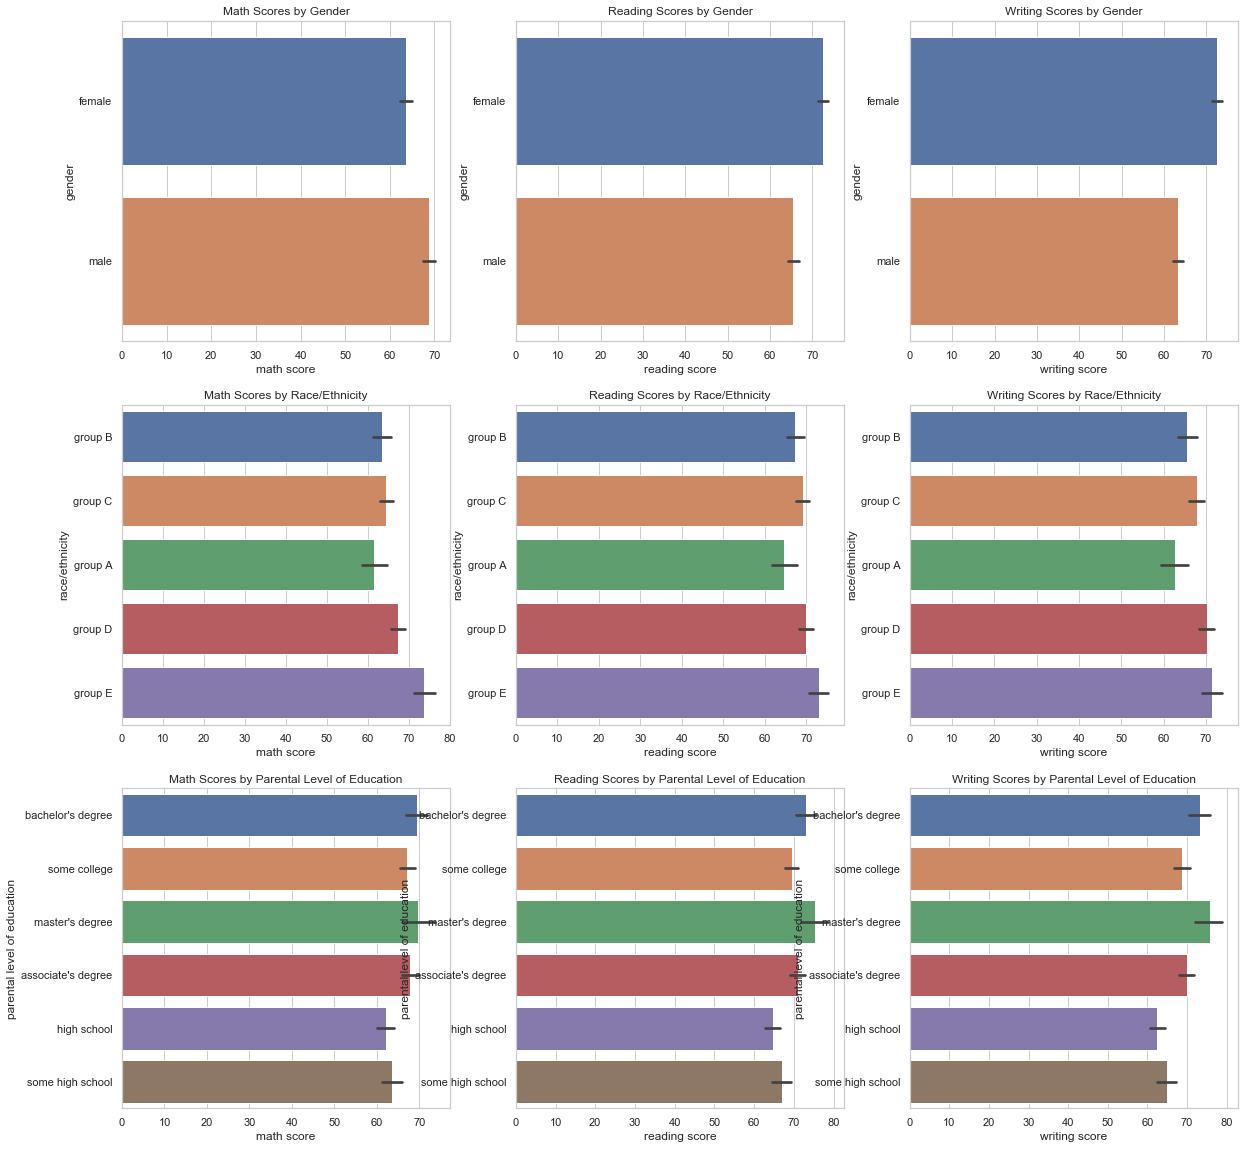

In [27]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.barplot(df['math score'], df['gender'])
plt.title("Math Scores by Gender")

plt.subplot(3,3,2)
sns.barplot(df['reading score'], df['gender'])
plt.title("Reading Scores by Gender")

plt.subplot(3,3,3)
sns.barplot(df['writing score'], df['gender'])
plt.title("Writing Scores by Gender")

plt.subplot(3,3,4)
sns.barplot(df['math score'], df['race/ethnicity'])
plt.title("Math Scores by Race/Ethnicity")

plt.subplot(3,3,5)
sns.barplot(df['reading score'], df['race/ethnicity'])
plt.title("Reading Scores by Race/Ethnicity")

plt.subplot(3,3,6)
sns.barplot(df['writing score'], df['race/ethnicity'])
plt.title("Writing Scores by Race/Ethnicity")

plt.subplot(3,3,7)
sns.barplot(df['math score'], df['parental level of education'])
plt.title("Math Scores by Parental Level of Education")

plt.subplot(3,3,8)
sns.barplot(df['reading score'], df['parental level of education'])
plt.title("Reading Scores by Parental Level of Education")

plt.subplot(3,3,9)
sns.barplot(df['writing score'], df['parental level of education'])
plt.title("Writing Scores by Parental Level of Education")

plt.show()

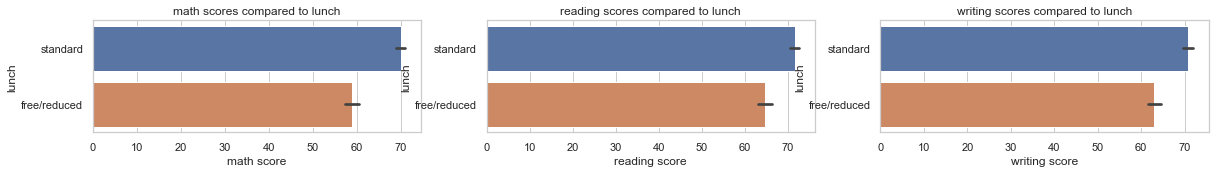

In [32]:
plt.figure(figsize=(20,7))

plt.subplot(3,3,1)
sns.barplot(df['math score'], df['lunch'])
plt.title("math scores compared to lunch")

plt.subplot(3,3,2)
sns.barplot(df['reading score'], df['lunch'])
plt.title("reading scores compared to lunch")

plt.subplot(3,3,3)
sns.barplot(df['writing score'], df['lunch'])
plt.title("writing scores compared to lunch")

plt.show()

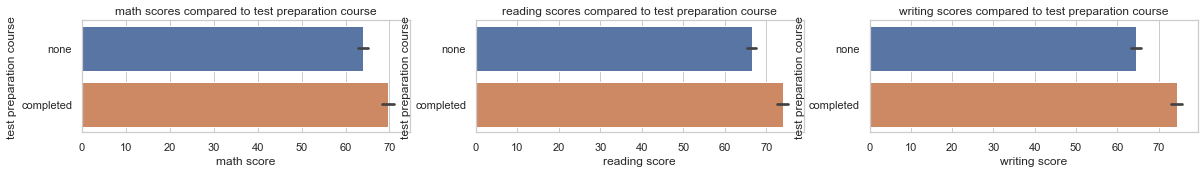

In [33]:
plt.figure(figsize=(20,7))

plt.subplot(3,3,1)
sns.barplot(df['math score'], df['test preparation course'])
plt.title("math scores compared to test preparation course")

plt.subplot(3,3,2)
sns.barplot(df['reading score'], df['test preparation course'])
plt.title("reading scores compared to test preparation course")

plt.subplot(3,3,3)
sns.barplot(df['writing score'], df['test preparation course'])
plt.title("writing scores compared to test preparation course")

plt.show()

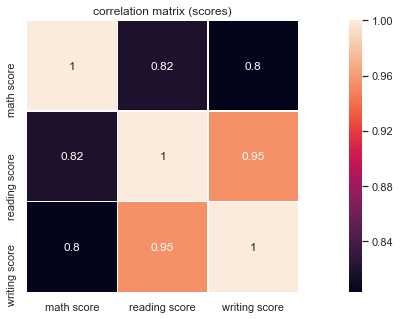

In [34]:
corr_matrix = df.corr()

plt.figure(figsize=(18,5))

plt.subplot(1,1,1)
# draw the heatmap using seaborn.
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (scores)")

plt.show()